# Text Classification Morocco World News

## Importation des librairies nécessaires

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import re

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

## Importation des données

In [76]:
data = pd.read_csv('morocco_world_news_articles.csv')
X, y = data.content, data.category
data.drop(columns=['Unnamed: 0'], inplace = True)
data.dropna(inplace = True)

## Visualisation des catégories

In [77]:
data["category"].value_counts()

opinion         1476
education       1390
maghreb-news    1370
covid-19        1359
economy          715
politics         407
society          203
Name: category, dtype: int64

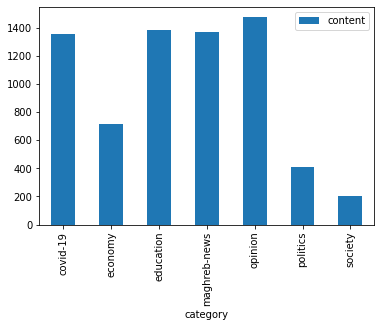

In [78]:
data.groupby('category').count().plot.bar(ylim=0)

## Preprocessing des données

In [79]:
stemmer = WordNetLemmatizer()

documents = []

for sen in range(0, len(X)):
  # suppression des caractères spéciaux
  document = re.sub(r'\W', ' ', str(X[sen]))
  # suppression des caractères uniques
  document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
  document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
  # suppression des espaces multiples
  document = re.sub(r'\s+', ' ', document, flags=re.I)
  # suppression des préfixes b
  document = re.sub(r'^b\s+', '', document)
  # concersion en minuscule
  document = document.lower()
  # lemmatisation
  document = document.split()
  document = [stemmer.lemmatize(word) for word in document]
  document = ' '.join(document)
  # ajout à la liste
  documents.append(document)

## Bag Of Words

In [80]:
# conversion des données textuelles en données numériques
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

## TF - IDF

In [81]:
# Term Frequency = Nombre d'occurences d'un mot / Nombre total des mots dans le document
# Inverse Document Frequency = log(Nombre total de documents / Nombre de documents contenant le mot)
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

## Division des données

In [82]:
# division des données en données d'entrapînement (80%) et données de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Forêts Aléatoires

### Entraînement du modèle

In [ ]:
# utilisation de l'algorithme des forêts aléatoires sur nos données d'entraînement
model_randomforest = RandomForestClassifier(n_estimators=1000, random_state=0)
model_randomforest.fit(X_train, y_train)

In [84]:
# prédiction à partir de nos données de test
y_pred = model_randomforest.predict(X_test)

### Evaluation du modèle

In [85]:
# évaluation du score globale du modèle
print(accuracy_score(y_test, y_pred))

0.8304597701149425


In [86]:
# évaluation de la précision : taux de prédictions positives correctes
# évaluation du recall : taux de positifs correctement prédits
# évaluation du f1-score : capacité d'un modèle à bien prédire les individus positifs
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    covid-19       0.88      0.92      0.90       277
     economy       0.75      0.79      0.77       130
   education       0.80      0.88      0.84       279
maghreb-news       0.83      0.88      0.86       294
     opinion       0.84      0.92      0.88       280
    politics       0.89      0.37      0.52        84
     society       1.00      0.12      0.22        48

    accuracy                           0.83      1392
   macro avg       0.85      0.70      0.71      1392
weighted avg       0.84      0.83      0.82      1392



## Régression Logistique

### Entraînement du modèle

In [ ]:
# utilisation de la régression logistique sur nos données d'entraînement
model_logisticregression = LogisticRegression(random_state=0)
model_logisticregression.fit(X_train, y_train)

In [88]:
# prédiction à partir de nos données de test
y_pred = model_logisticregression.predict(X_test)

### Evaluation du modèle

In [89]:
# évaluation du score globale du modèle
print(accuracy_score(y_test, y_pred))

0.8505747126436781


In [90]:
# évaluation de la précision : taux de prédictions positives correctes
# évaluation du recall : taux de positifs correctement prédits
# évaluation du f1-score : capacité d'un modèle à bien prédire les individus positifs
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    covid-19       0.91      0.88      0.90       277
     economy       0.74      0.85      0.79       130
   education       0.88      0.90      0.89       279
maghreb-news       0.83      0.90      0.87       294
     opinion       0.85      0.93      0.89       280
    politics       0.82      0.48      0.60        84
     society       0.73      0.23      0.35        48

    accuracy                           0.85      1392
   macro avg       0.82      0.74      0.76      1392
weighted avg       0.85      0.85      0.84      1392



## Arbre de décision

### Entraînement du modèle

In [ ]:
# utilisation d'arbres de décision sur nos données d'entraînement
model_decisiontree = DecisionTreeClassifier()
model_decisiontree.fit(X_train, y_train)

In [92]:
# prédiction à partir de nos données de test
y_pred = model_decisiontree.predict(X_test)

### Evaluation du modèle

In [93]:
# évaluation du score globale du modèle
print(accuracy_score(y_test, y_pred))

0.7248563218390804


In [94]:
# évaluation de la précision : taux de prédictions positives correctes
# évaluation du recall : taux de positifs correctement prédits
# évaluation du f1-score : capacité d'un modèle à bien prédire les individus positifs
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    covid-19       0.83      0.85      0.84       277
     economy       0.59      0.65      0.62       130
   education       0.75      0.78      0.77       279
maghreb-news       0.78      0.75      0.77       294
     opinion       0.75      0.75      0.75       280
    politics       0.38      0.32      0.35        84
     society       0.33      0.27      0.30        48

    accuracy                           0.72      1392
   macro avg       0.63      0.62      0.63      1392
weighted avg       0.72      0.72      0.72      1392



## K Nearest Neighbour

### Entraînement du modèle

In [ ]:
# utilisation de l'algorithme des k plus proches voisins sur nos données d'entraînement
model_knn = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
model_knn.fit(X_train, y_train)

In [96]:
# prédiction à partir de nos données de test
y_pred = model_knn.predict(X_test)

### Evaluation du modèle

In [97]:
# évaluation du score globale du modèle
print(accuracy_score(y_test, y_pred))

0.7047413793103449


In [98]:
# évaluation de la précision : taux de prédictions positives correctes
# évaluation du recall : taux de positifs correctement prédits
# évaluation du f1-score : capacité d'un modèle à bien prédire les individus positifs
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    covid-19       0.80      0.82      0.81       277
     economy       0.69      0.62      0.65       130
   education       0.73      0.83      0.78       279
maghreb-news       0.83      0.68      0.75       294
     opinion       0.57      0.79      0.66       280
    politics       0.44      0.21      0.29        84
     society       0.75      0.06      0.12        48

    accuracy                           0.70      1392
   macro avg       0.69      0.57      0.58      1392
weighted avg       0.71      0.70      0.69      1392



## Machine à vecteurs de support

### Entraînement du modèle

In [ ]:
# utilisation de la machine à vecteurs de support sur nos données d'entraînement
model_svc = SVC()
model_svc.fit(X_train, y_train)

In [100]:
# prédiction à partir de nos données de test
y_pred = model_svc.predict(X_test)

### Evaluation du modèle

In [101]:
# évaluation du score globale du modèle
print(accuracy_score(y_test, y_pred))

0.853448275862069


In [102]:
# évaluation de la précision : taux de prédictions positives correctes
# évaluation du recall : taux de positifs correctement prédits
# évaluation du f1-score : capacité d'un modèle à bien prédire les individus positifs
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    covid-19       0.92      0.89      0.90       277
     economy       0.75      0.86      0.80       130
   education       0.85      0.92      0.88       279
maghreb-news       0.85      0.90      0.88       294
     opinion       0.87      0.91      0.89       280
    politics       0.78      0.45      0.57        84
     society       0.79      0.31      0.45        48

    accuracy                           0.85      1392
   macro avg       0.83      0.75      0.77      1392
weighted avg       0.85      0.85      0.85      1392



## Gradient Stochastique

### Entraînement du modèle

In [ ]:
# utilisation de l'aglorithme du gradient stochastique sur nos données d'entraînement
model_sgd = SGDClassifier()
model_sgd.fit(X_train, y_train)

In [104]:
# prédiction à partir de nos données de test
y_pred = model_sgd.predict(X_test)

### Evaluation du modèle

In [105]:
# évaluation du score globale du modèle
print(accuracy_score(y_test, y_pred))

0.853448275862069


In [106]:
# évaluation de la précision : taux de prédictions positives correctes
# évaluation du recall : taux de positifs correctement prédits
# évaluation du f1-score : capacité d'un modèle à bien prédire les individus positifs
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    covid-19       0.93      0.87      0.90       277
     economy       0.76      0.85      0.80       130
   education       0.86      0.91      0.89       279
maghreb-news       0.85      0.90      0.87       294
     opinion       0.87      0.91      0.89       280
    politics       0.78      0.54      0.63        84
     society       0.67      0.33      0.44        48

    accuracy                           0.85      1392
   macro avg       0.81      0.76      0.78      1392
weighted avg       0.85      0.85      0.85      1392



## Perceptron Multicouche

### Entraînement du modèle

In [ ]:
# utilisation d'un perceptron multicouche sur nos données d'entraînement
model_mlp = MLPClassifier()
model_mlp.fit(X_train, y_train)

In [108]:
# prédiction à partir de nos données de test
y_pred = model_mlp.predict(X_test)

### Evaluation du modèle

In [109]:
# évaluation du score globale du modèle
print(accuracy_score(y_test, y_pred))

0.8283045977011494


In [110]:
# évaluation de la précision : taux de prédictions positives correctes
# évaluation du recall : taux de positifs correctement prédits
# évaluation du f1-score : capacité d'un modèle à bien prédire les individus positifs
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    covid-19       0.88      0.87      0.88       277
     economy       0.74      0.79      0.76       130
   education       0.80      0.86      0.83       279
maghreb-news       0.86      0.87      0.87       294
     opinion       0.85      0.86      0.86       280
    politics       0.75      0.56      0.64        84
     society       0.67      0.46      0.54        48

    accuracy                           0.83      1392
   macro avg       0.79      0.75      0.77      1392
weighted avg       0.83      0.83      0.83      1392

